In [1]:
from sportsipy.mlb.teams import Teams
from scipy.stats import pearsonr
from scipy.stats import skew,kurtosis
import statistics
import pandas as pd
from matplotlib import pyplot as plt
import collections

In [7]:
minDelta = 0
maxDelta = 0
deltaList = []
for year in range(1966, 2021):
    teams = list(Teams(year))
    statd = {}
    for i,team in enumerate(teams[0:len(teams)]):
        G = team.games
        GF = int(G*team.runs)
        GA = int(G*team.runs_against)
        statd[i] = {'Team' : team.name,
                    'WinPct' : round(100*team.wins/G,3),
                    'GfrPct' : round(100*GF/(GF+GA),3)}
        
    df = pd.DataFrame(statd)
    df = df.transpose()

    l = df[['WinPct','GfrPct']].values.tolist()
    seq = sorted(l, key=lambda x: ((-float(x[0])), (-float(x[1]))))
    index = [seq.index(v) for v in l]
    df['Iwin'] =  index

    l = df[['GfrPct','WinPct']].values.tolist()
    seq = sorted(l, key=lambda x: ((-float(x[0])), (-float(x[1]))))
    index = [seq.index(v) for v in l]
    df['Igfp'] =  index

    df['Delta'] = df['Igfp']-df['Iwin']
    x = list(df['Delta'])
    
    locMinDelta = int(min(df['Delta']))
    locMinTeam = df.Team[df['Delta'] == locMinDelta]
    locMinTeam = locMinTeam.to_string(index=False)
    locMaxDelta = int(max(df['Delta']))
    locMaxTeam = df.Team[df['Delta'] == locMaxDelta]
    locMaxTeam = locMaxTeam.to_string(index=False)
        
    if maxDelta == minDelta:
        minDelta = locMinDelta
        maxDelta = locMaxDelta
        minTeam = locMinTeam
        maxTeam = locMaxTeam
        minYear = year
        maxYear = year
        print('%s %s: %s (new minDelta) (new maxDelta)' % (year,locMinTeam,round(minDelta,3)))
    if locMinDelta < minDelta:
        minDelta= locMinDelta
        minTeam = locMinTeam
        minYear = year
        print('%s %s: %s (new min)' % (year,locMinTeam,round(minDelta,3)))
    if locMaxDelta > maxDelta:
        maxDelta = locMaxDelta
        maxTeam = locMaxTeam
        maxYear = year
        print('%s %s: %s (new max)' % (year,locMaxTeam,round(maxDelta,3)))
    
    for d in x:
        deltaList.append(d)

deltaList=sorted(deltaList,reverse=False)

1966  New York Yankees: -8 (new minDelta) (new maxDelta)
1968  Boston Red Sox: 6 (new max)
1972  Chicago White Sox: 7 (new max)
1973  Detroit Tigers: 9 (new max)
1981  Texas Rangers: -9 (new min)
1981  Baltimore Orioles: 13 (new max)
1984  Pittsburgh Pirates: -14 (new min)
1984  New York Mets: 15 (new max)


In [8]:
print('max: ' + str(max(deltaList)))
print('min: ' + str(min(deltaList)))
print('median: ' + str(statistics.median(deltaList)))
print('mean: ' + str(round(statistics.mean(deltaList),2)))
print('mode: ' + str(statistics.mode(deltaList)))
print('pstdev: ' + str(round(statistics.pstdev(deltaList),2)))
print('pvariance: ' + str(round(statistics.pvariance(deltaList),2)))
print('skew: ' + str(round(skew(deltaList,bias=False),2)))
print('kurtosis-3: ' + str(round(kurtosis(deltaList,bias=False)-3,2)))

quartiles=[round(q, 2) for q in statistics.quantiles(deltaList, n=4)]
print('quartiles(excl): '+ str(quartiles))
deciles=[round(q, 2) for q in statistics.quantiles(deltaList, n=10)]
print('deciles(excl): '+ str(deciles))
print('count: ' + str(len(deltaList)))

max: 15
min: -14
median: 0.0
mean: 0
mode: 0
pstdev: 3.11
pvariance: 9.67
skew: 0.04
kurtosis-3: -1.3
quartiles(excl): [-2.0, 0.0, 2.0]
deciles(excl): [-4.0, -2.0, -1.0, -1.0, 0.0, 1.0, 1.0, 2.0, 4.0]
count: 1498


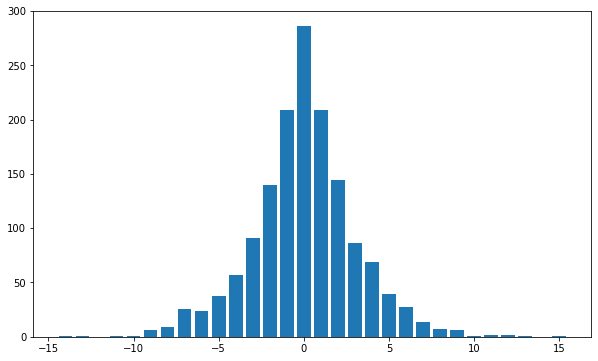

In [9]:
counter=collections.Counter(deltaList)
dely = list(counter.values())
delx = list(counter.keys())
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(delx,dely)
plt.show()

In [10]:
pd.DataFrame(list(zip(delx,dely)),columns=['delta','freq'])

,delta,freq
0,-14,1
1,-13,1
2,-11,1
3,-10,1
4,-9,6
5,-8,9
6,-7,26
7,-6,24
8,-5,38
9,-4,57
